# Análises e Resultados

# Importações

In [206]:
import pandas as pd
#import numpy as np
#from datetime import datetime
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns

### Leitura CSV

In [74]:
staff_store = pd.read_csv("staff_store.csv")
alugueis = pd.read_csv("alugueis.csv")
df1 = pd.read_csv("df1.csv")
customer_completa = pd.read_csv("customer_completa.csv")
film = pd.read_csv("film.csv")
film_actor = pd.read_csv("film_actor.csv")
film_category = pd.read_csv("film_category.csv")
category = pd.read_csv("category.csv")
actor = pd.read_csv("actor.csv")

In [76]:
# Dropando a coluna "last_update" 
film = film.drop(columns='last_update')
film_actor = film_actor.drop(columns='last_update')
film_category = film_category.drop(columns='last_update')
category = category.drop(columns='last_update')
actor = actor.drop(columns='last_update')

In [77]:
#actor = actor.drop(columns='last_update')

In [198]:
alugueis.head()

,rental_id,rental_date,inventory_id,customer_id,return_date,staff_id,film_id,store_id,category_id,name,rental_duration,rental_rate,replacement_cost
0,2,2005-05-24 22:54:33,1525,459,2005-05-28 19:40:33,1,333,2,12,Music,7,2.99,16.99
1,1449,2005-06-15 19:19:16,1525,471,2005-06-18 15:24:16,2,333,2,12,Music,7,2.99,16.99
2,5499,2005-07-10 00:27:45,1525,127,2005-07-17 06:11:45,1,333,2,12,Music,7,2.99,16.99
3,9711,2005-07-31 08:06:41,1525,231,2005-08-02 10:30:41,2,333,2,12,Music,7,2.99,16.99
4,769,2005-05-29 12:51:44,1523,575,2005-06-01 17:43:44,1,333,1,12,Music,7,2.99,16.99


## Análises

### Quais são os gêneros de filmes mais locados pelos clientes da Discorama?

In [201]:
# Agrupar os aluguéis por gênero e contar quantas vezes cada gênero aparece
genero = alugueis.groupby('category_id')['rental_id'].count()

# Encontrar o gênero mais popular (aquele com a contagem mais alta)
genero_mais_popular = genero.idxmax()

# Mostrar o gênero mais popular
print("O gênero mais popular é:", genero_mais_popular)


O gênero mais popular é: 15


In [203]:
# Contar a frequência de cada categoria (quantas vezes cada categoria foi locada)
frequencia_categoria = alugueis['category_id'].value_counts()

# Mostrar a frequência de cada categoria
print(frequencia_categoria)


category_id
15    810
2     808
1     776
14    767
8     757
7     747
6     734
9     711
10    661
3     655
4     648
5     640
13    639
11    582
16    577
12    574
Name: count, dtype: int64


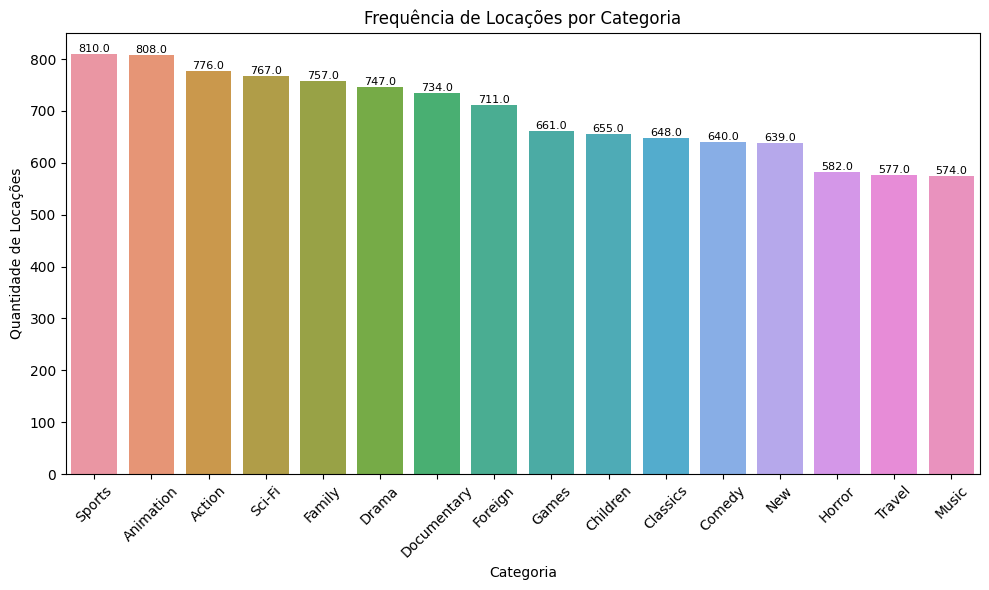

In [213]:
# Contar a frequência de cada categoria (quantas vezes cada categoria foi locada)
frequencia_categoria = alugueis['name'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
ax = sns.barplot(x=frequencia_categoria.index, y=frequencia_categoria.values)
plt.xticks(rotation=45)  # Rotação dos rótulos do eixo x
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Locações')
plt.title('Frequência de Locações por Categoria')

# Adicionar os totais em cada coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.tight_layout()

# Mostrar o gráfico
plt.show()

#### Quais são os gêneros de filmes com melhor desempenho em termos de receita?

In [196]:
# Agrupando por categoria de filme e realizando a operação de soma da receita
grupo_por_categoria = alugueis.groupby('name')['replacement_cost'].sum().reset_index()

# Ordenando os resultados em ordem decrescente pela receita total
grupo_por_categoria = grupo_por_categoria.sort_values(by='replacement_cost', ascending=False)

# Exibindo os resultados
print(grupo_por_categoria)

           name  replacement_cost
14       Sports          16595.90
1     Animation          16360.92
0        Action          16325.24
13       Sci-Fi          16261.33
6         Drama          16102.53
5   Documentary          15238.66
7        Family          15180.43
9         Games          13589.39
3      Classics          13564.52
2      Children          13240.45
8       Foreign          13228.89
12          New          12615.61
4        Comedy          12119.60
10       Horror          11395.18
15       Travel          11027.23
11        Music          11019.26


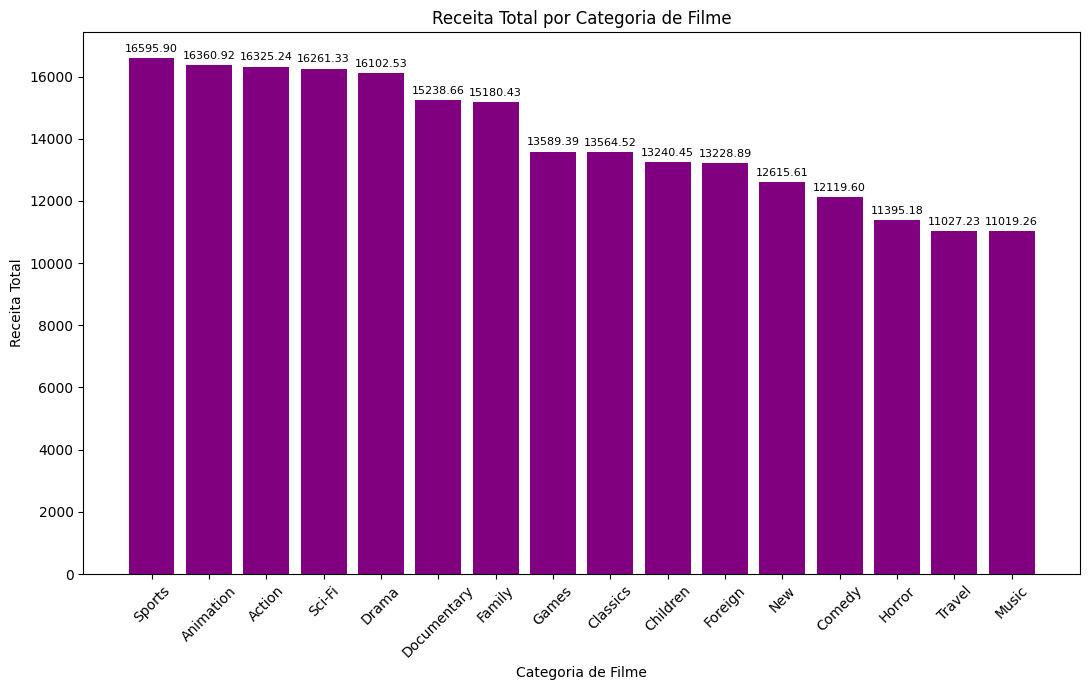

In [152]:
# Criando um gráfico de barras com a cor roxa
plt.figure(figsize=(11, 7))
bars = plt.bar(grupo_por_categoria['name'], grupo_por_categoria['replacement_cost'], color='purple')

# Adicionar rótulos nas colunas (categorias de filme)
plt.xlabel('Categoria de Filme')
plt.ylabel('Receita Total')
plt.title('Receita Total por Categoria de Filme')
plt.xticks(grupo_por_categoria['name'], grupo_por_categoria['name'].values, rotation=45)

# Adicionar os totais acima de cada coluna
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                 textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Concatenando a tabela "film" + "film_actor" + "film_category" + "category", para conter filme, ator e categoria na mesma tabela

In [116]:
# Concatenando a tabela "film" + "film_actor" + "film_category", para conter filme, ator e categoria na mesma tabela
film_completa = film.merge(film_actor, on=['film_id'], how='inner').merge(film_category, on=['film_id'], how='inner')

# Exibir a tabela completa resultante (Film_completa)
film_completa.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,fulltext,actor_id,category_id
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...,29,12
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...,60,12
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...,68,12


In [117]:
# Dropando colunas desnecessárias para análise
film_completa = film_completa.drop(columns=['rating', 'special_features', 'fulltext'])


# Exibir a tabela completa resultante (Film_completa)
film_completa.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,category_id
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,29,12
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,60,12
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,68,12


In [118]:
category.head()

,category_id,name
0,1,Action
1,2,Animation
2,3,Children
3,4,Classics
4,5,Comedy


In [119]:
# Juntar o DataFrame "film_completa" com o DataFrame "category" usando a coluna "category_id"
film_completa = pd.merge(film_completa, category, on='category_id', how='left')

# Exibir o DataFrame resultante
film_completa.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,category_id,name
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,29,12,Music
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,60,12,Music
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,68,12,Music


In [120]:
# Verificando a quantidade de valores nulos (NaN) ou em branco em cada coluna
valores_nulos = film_completa.isnull().sum()
print("Quantidade de valores nulos (NaN) ou em branco em cada coluna:")
print(valores_nulos)

Quantidade de valores nulos (NaN) ou em branco em cada coluna:
film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
actor_id            0
category_id         0
name                0
dtype: int64


In [121]:
actor.head()

,actor_id,first_name,last_name,ator_atriz
0,1,Penelope,Guiness,Penelope Guiness
1,2,Nick,Wahlberg,Nick Wahlberg
2,3,Ed,Chase,Ed Chase
3,4,Jennifer,Davis,Jennifer Davis
4,5,Johnny,Lollobrigida,Johnny Lollobrigida


In [122]:
# Concatenando as colunas "first_name" e "last_name" em uma única coluna chamada "ator_atriz"
actor['ator_atriz'] = actor.apply(lambda row: f"{row['first_name']} {row['last_name']}", axis=1)

# Exibir o DataFrame "actor" com a nova coluna "full_name"
print(actor)

     actor_id first_name     last_name           ator_atriz
0           1   Penelope       Guiness     Penelope Guiness
1           2       Nick      Wahlberg        Nick Wahlberg
2           3         Ed         Chase             Ed Chase
3           4   Jennifer         Davis       Jennifer Davis
4           5     Johnny  Lollobrigida  Johnny Lollobrigida
..        ...        ...           ...                  ...
195       196       Bela        Walken          Bela Walken
196       197      Reese          West           Reese West
197       198       Mary        Keitel          Mary Keitel
198       199      Julia       Fawcett        Julia Fawcett
199       200      Thora        Temple         Thora Temple

[200 rows x 4 columns]


In [123]:
# Juntar o DataFrame "film_completa" com o DataFrame "actor" usando a coluna "actor_id"
film_completa = pd.merge(film_completa, actor, on='actor_id', how='left')

# Exibir o DataFrame resultante
film_completa.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,category_id,name,first_name,last_name,ator_atriz
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,29,12,Music,Alec,Wayne,Alec Wayne
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,60,12,Music,Henry,Berry,Henry Berry
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,68,12,Music,Rip,Winslet,Rip Winslet


In [124]:
# Dropando colunas desnecessárias para análise
film_completa = film_completa.drop(columns=['first_name', 'last_name'])

In [125]:
film_completa.head(3)

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,actor_id,category_id,name,ator_atriz
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,29,12,Music,Alec Wayne
1,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,60,12,Music,Henry Berry
2,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,68,12,Music,Rip Winslet


In [126]:
# Verificar a quantidade de valores nulos (NaN) ou em branco em cada coluna
valores_nulos = film_completa.isnull().sum()
print("Quantidade de valores nulos (NaN) ou em branco em cada coluna:")
print(valores_nulos)

Quantidade de valores nulos (NaN) ou em branco em cada coluna:
film_id             0
title               0
description         0
release_year        0
language_id         0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
actor_id            0
category_id         0
name                0
ator_atriz          0
dtype: int64


### Total de filmes

In [127]:
# Número total de filmes na tabela
total_filmes = film_completa.shape[0]

print(f"Total de Filmes: {total_filmes}")

Total de Filmes: 5462


### Total de filmes por categoria

In [129]:
# Calculando o total de filmes por categoria
film_categoria = film_completa.groupby('name')['film_id'].count()

print(film_categoria)


name
Action         363
Animation      361
Children       344
Classics       307
Comedy         286
Documentary    385
Drama          350
Family         347
Foreign        397
Games          293
Horror         317
Music          281
New            343
Sci-Fi         326
Sports         441
Travel         321
Name: film_id, dtype: int64


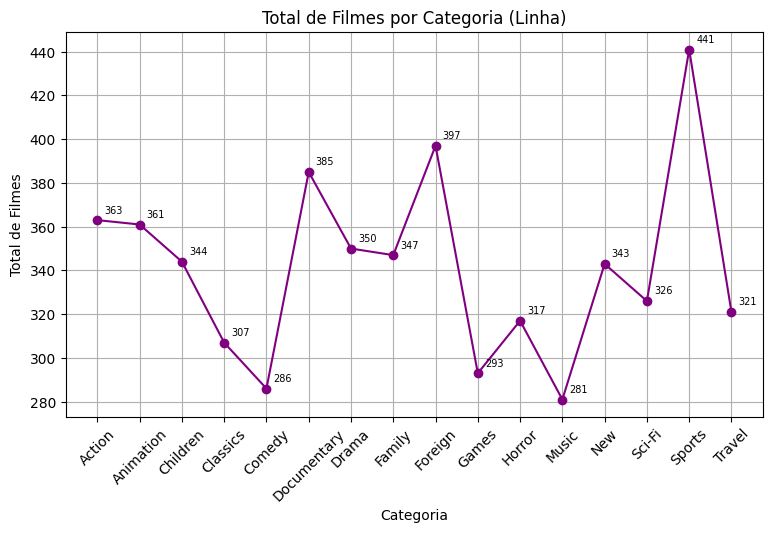

In [161]:
# Definindo tamanho personalizado do gráfico
plt.figure(figsize=(9, 5))


# Criaando um gráfico de linhas com rótulos de valores
plt.plot(film_categoria.index, film_categoria.values, marker='o', color='purple')
plt.xlabel('Categoria')
plt.ylabel('Total de Filmes')
plt.title('Total de Filmes por Categoria (Linha)')
plt.xticks(rotation=45)

# Adicionando rótulos de valores
for i, value in enumerate(film_categoria.values):
    plt.annotate(str(value), xy=(i, value), xytext=(5, 5), textcoords='offset points', fontsize=7)

plt.grid(True)
plt.show()

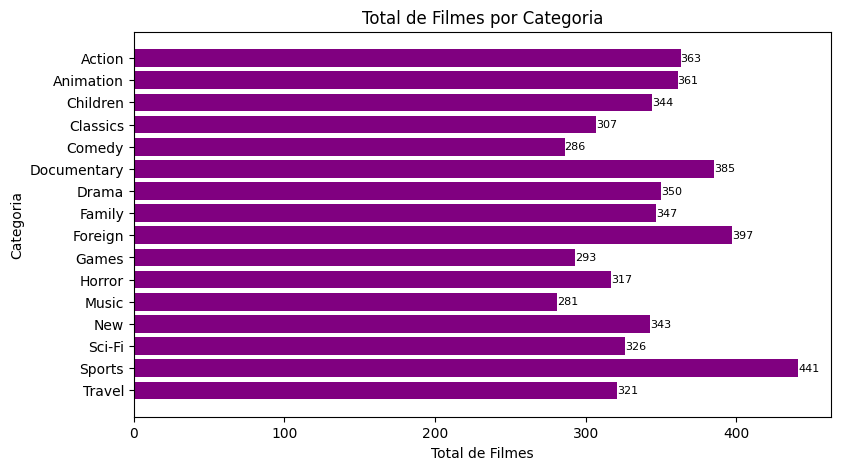

In [163]:
# Definindo tamanho personalizado do gráfico
plt.figure(figsize=(9, 5))

# Criaando um gráfico de barras horizontais
plt.barh(film_categoria.index, film_categoria.values, color='purple')
plt.xlabel('Total de Filmes')
plt.ylabel('Categoria')
plt.title('Total de Filmes por Categoria')

# Invertendo a ordem das categorias para que a maior categoria fique no topo
plt.gca().invert_yaxis()

# Adicionando rótulos aos pontos
for i, value in enumerate(film_categoria.values):
    plt.text(value, i, str(value), va='center', fontsize=8, color='black')


plt.show()

### Quais as categorias de filmes que os atores/atrizes mais participam ?

In [167]:
# Calculando o total de atores únicos
total_atores = film_completa['actor_id'].nunique()

print("Total de Atores:", total_atores)

Total de Atores: 200


In [169]:
# Agrupando por ator e categoria e contando a frequência
ator_categoria = film_completa.groupby(['actor_id', 'ator_atriz', 'name'])['film_id'].count()

# Encontrando as categorias mais frequentes para cada ator
categorias = ator_categoria.groupby('actor_id').idxmax()

print(categorias)

actor_id
1              (1, Penelope Guiness, Horror)
2                 (2, Nick Wahlberg, Family)
3                 (3, Ed Chase, Documentary)
4           (4, Jennifer Davis, Documentary)
5      (5, Johnny Lollobrigida, Documentary)
                       ...                  
196               (196, Bela Walken, Comedy)
197              (197, Reese West, Classics)
198            (198, Mary Keitel, Animation)
199          (199, Julia Fawcett, Animation)
200            (200, Thora Temple, Classics)
Name: film_id, Length: 200, dtype: object


In [195]:
# VERIFICAR MAIS TARDE, POIS NÃO ESTÁ SALVANDO OS DADOS, APENAS O NOME DAS COLUNAS
# Salvar o DataFrame em um arquivo CSV
categorias.to_csv("categorias.csv", index=False)

# Lendo o csv categorias
categorias = pd.read_csv("categorias.csv")

In [188]:
# Dividindo os dados através da virgula
# Loop através dos dados
for dado in categorias:
    # Extrair os valores da tupla
    actor_id = dado[0]
    nome = dado[1]
    categoria = dado[2]
    
    # Imprimir os valores separados
    print("actor_id:", actor_id)
    print("nome:", nome)
    print("categoria:", categoria)
    print(5)


actor_id: a
nome: c
categoria: t
5
actor_id: n
nome: o
categoria: m
5
actor_id: c
nome: a
categoria: t
5


### Como a duração média do aluguel varia em diferentes categorias de filmes?

# Salvando os DF criados em csv

In [ ]:
# Definindo o caminho e nome do arquivo CSV para cada DataFrame
caminho_NOME = 'C:/Users/aurel/OneDrive/Área de Trabalho/DESAFIO-DISCORAMA/DESAFIO_DISCORAMA/df_analises/NOME.csv'

In [ ]:
# Salvando cada DataFrame em um arquivo CSV
staff_store.to_csv(caminho_NOME, index=False)